In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

#preprocessing data 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

#scoring
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#train test split
from sklearn.model_selection import  train_test_split

#column transformer and pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("Notebook/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Splitting data into dependent and independent variables

In [3]:
X = df.drop(columns=['math_score'], axis=1)
y = df['math_score']

In [4]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [6]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [7]:
categorical_features = [feature for feature in X.columns if X[feature].dtypes == "O"]
numerical_features = [feature for feature in X.columns if X[feature].dtypes != "O"]

ohe = OneHotEncoder()
scaler = StandardScaler()

preprocessor = ColumnTransformer([
    ("OneHotEncoder", ohe, categorical_features),
    ("StandardScaler", scaler, numerical_features),  
])



In [8]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [9]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [10]:
def evaluate_model(true, pred):
    r2score = r2_score(true, pred)
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    return mae, rmse, r2score, mse

In [14]:
models = {
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" :XGBRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #make prediction
    y_test_pred = model.predict(X_test)

        # Evaluate Test dataset
    model_test_mae, model_test_rmse, model_test_r2, model_test_mse = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean Square Error: {:.4f}".format(model_test_mse))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

LinearRegression
Model performance for Test set
- Root Mean Squared Error: 5.3573
- Mean Absolute Error: 4.1803
- Mean Square Error: 28.7003
- R2 Score: 0.8821


Lasso
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- Mean Square Error: 42.5064
- R2 Score: 0.8253


Ridge
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- Mean Square Error: 29.0563
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Test set
- Root Mean Squared Error: 7.2530
- Mean Absolute Error: 5.6210
- Mean Square Error: 52.6066
- R2 Score: 0.7838


Decision Tree
Model performance for Test set
- Root Mean Squared Error: 7.8106
- Mean Absolute Error: 6.1250
- Mean Square Error: 61.0050
- R2 Score: 0.7493


Random Forest Regressor
Model performance for Test set
- Root Mean Squared Error: 5.9938
- Mean Absolute Error: 4.6233
- Mean Square Error: 35.9258
- R2 Score: 0.8524


XGBRegressor
Model performance for Test s

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
0,LinearRegression,0.882056
2,Ridge,0.880593
7,AdaBoost Regressor,0.852763
5,Random Forest Regressor,0.852363
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.749300


### Best  model is linear regression

In [16]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.21


### Plot y_pred and y_test

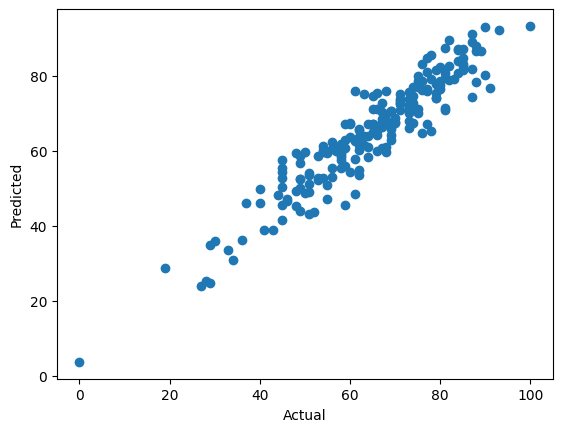

In [17]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

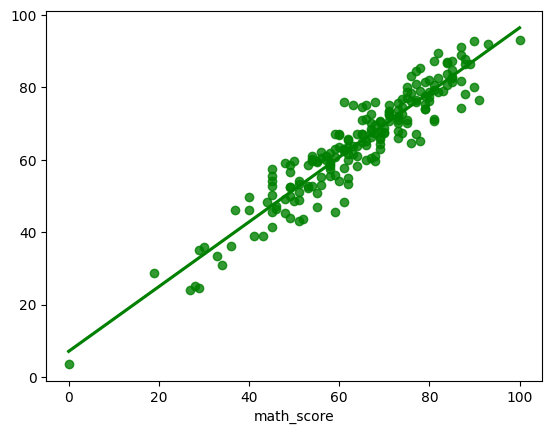

In [19]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='green');

### Diff. btw Actual and Predicted Values

In [20]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.5625,14.4375
737,53,58.5000,-5.5000
740,80,77.4375,2.5625
660,74,76.9375,-2.9375
411,84,87.0625,-3.0625
...,...,...,...
408,52,43.6875,8.3125
332,62,61.5000,0.5000
208,74,67.4375,6.5625
613,65,67.1875,-2.1875
